# Hello, PyTorch:: homework tasks

There are 3 tasks with different relative __point__ worth.
If you get stuck with no progress, try switching to the next task and returning later.

In [1]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/deep_vision_and_graphics/fall22/week01-pytorch_intro/notmnist.py
    !touch .setup_complete

In [2]:
import numpy as np
import torch
print(torch.__version__)

1.12.1


### Task I (20% points) - tensormancy

![img](https://media.giphy.com/media/3o751UMCYtSrRAFRFC/giphy.gif)

When dealing with more complex stuff like neural network, it's best if you use tensors the way samurai uses his sword. 


__1.1 The Cannabola__ 
[(_disclaimer_)](https://gist.githubusercontent.com/justheuristic/e2c1fa28ca02670cabc42cacf3902796/raw/fd3d935cef63a01b85ed2790b5c11c370245cbd7/stddisclaimer.h)

Let's write another function, this time in polar coordinates:
$$\rho(\theta) = (1 + 0.9 \cdot cos (8 \cdot \theta) ) \cdot (1 + 0.1 \cdot cos(24 \cdot \theta)) \cdot (0.9 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (1 + sin(\theta))$$


Then convert it into cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)) and plot the results.

Use torch tensors only: no lists, loops, numpy arrays, etc.

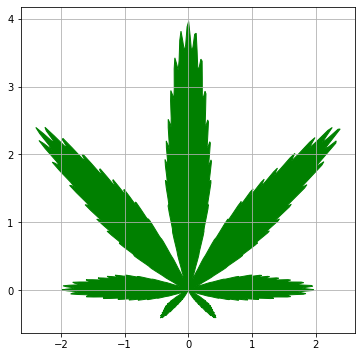

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

theta = torch.linspace(- np.pi, np.pi, steps=1000)

# compute rho(theta) as per formula above
rho = (1 + 0.9 * torch.cos(8 * theta)) * (1 + 0.1 * torch.cos(24 * theta)) * (0.9 + 0.05 * torch.cos(200 * theta)) * (1 + torch.sin(theta))

# Now convert polar (rho, theta) pairs into cartesian (x,y) to plot them.
x = rho * torch.cos(theta)
y = rho * torch.sin(theta)


plt.figure(figsize=[6, 6])
plt.fill(x.numpy(), y.numpy(), color='green')
plt.grid()

### Task II: The Game of Life (30% points)

Now it's time for you to make something more challenging. We'll implement Conway's [Game of Life](http://web.stanford.edu/~cdebs/GameOfLife/) in _pure PyTorch_. 

While this is still a toy task, implementing game of life this way has one cool benefit: __you'll be able to run it on GPU!__ Indeed, what could be a better use of your GPU than simulating Game of Life on 1M/1M grids?

![img](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/Preview_Image.png)
If you've skipped the URL above out of sloth, here's the Game of Life:
* You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
* Any living cell that has 2 or 3 neighbors survives, else it dies [0,1 or 4+ neighbors]
* Any cell with exactly 3 neighbors becomes alive (if it was dead)

For this task, you are given a reference NumPy implementation that you must convert to PyTorch.
_[NumPy code inspired by: https://github.com/rougier/numpy-100]_


__Note:__ You can find convolution in `torch.nn.functional.conv2d(Z,filters)`. Note that it has a different input format.

__Note 2:__ From the mathematical standpoint, PyTorch convolution is actually cross-correlation. Those two are very similar operations. More info: [video tutorial](https://www.youtube.com/watch?v=C3EEy8adxvc), [scipy functions review](http://programmerz.ru/questions/26903/2d-convolution-in-python-similar-to-matlabs-conv2-question), [stack overflow source](https://stackoverflow.com/questions/31139977/comparing-matlabs-conv2-with-scipys-convolve2d).

In [7]:
from scipy.signal import correlate2d

def np_update(Z):
    # Count neighbours with convolution
    filters = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]])

    N = correlate2d(Z, filters, mode='same')

    # Apply rules
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive
    return Z

In [8]:
def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.

    You can opt to create a new tensor or change Z inplace.
    """

    filters = torch.tensor(
        [[[[1, 1, 1],
        [1, 0, 1],
        [1, 1, 1]]]]
    ).float()
    
    N = torch.nn.functional.conv2d(Z.unsqueeze(dim=0), weight=filters, padding=1)
    
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive

    return Z

In [9]:
# initial frame
Z_numpy = np.random.choice([0, 1], p=(0.5, 0.5), size=(100, 100))
Z = torch.from_numpy(Z_numpy).type(torch.FloatTensor)

# your debug polygon :)
Z_new = torch_update(Z.clone())

# tests
Z_reference = np_update(Z_numpy.copy())
assert np.all(Z_new.numpy() == Z_reference), \
    "your PyTorch implementation doesn't match np_update. Look into Z and np_update(ZZ) to investigate."
print("Well done!")

Well done!


<IPython.core.display.Javascript object>


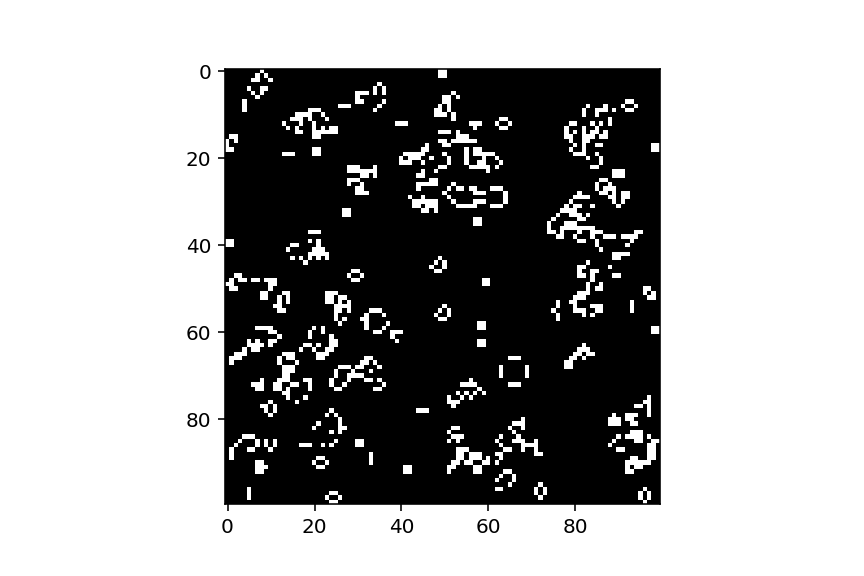

In [10]:
%matplotlib notebook
plt.ion()

# initialize game field
Z = np.random.choice([0, 1], size=(100, 100))
Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    # update
    Z = torch_update(Z)

    # re-draw image
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

<IPython.core.display.Javascript object>


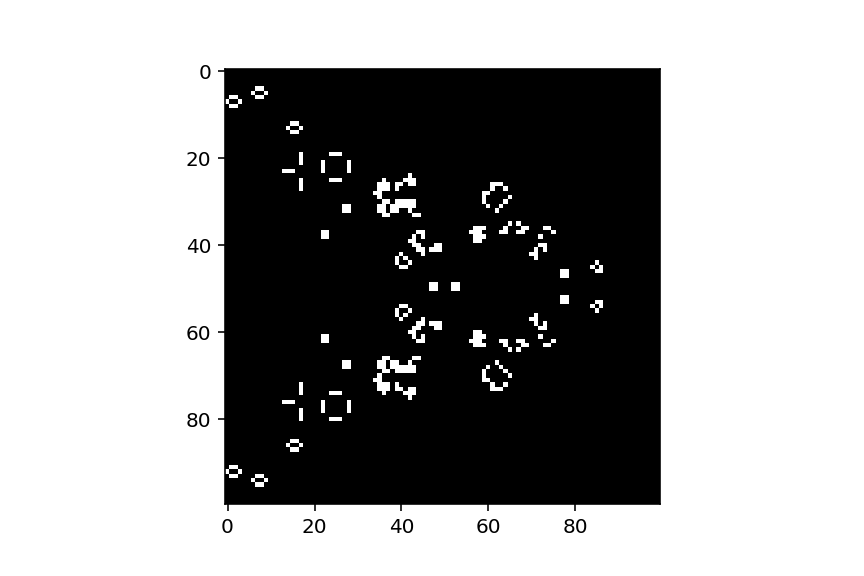

In [11]:
# Some fun setups for your amusement

# parallel stripes
Z = np.arange(100) % 2 + np.zeros([100, 100])
# with a small imperfection
Z[48:52, 50] = 1

Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    Z = torch_update(Z)
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

More fun with Game of Life: [video](https://www.youtube.com/watch?v=C2vgICfQawE)

### Task III: Going deeper (50% points)
<img src="http://download.gamezone.com/uploads/image/data/1190338/article_post_width_a88.jpg" width=360>
Your ultimate task for this week is to build your first neural network [almost] from scratch and pure PyTorch.

This time you will solve the same digit recognition problem, but at a larger scale

* 10 different letters
* 20k samples

We want you to build a network that reaches at least 80% accuracy and has at least 2 linear layers in it. Naturally, it should be nonlinear to beat logistic regression.

With 10 classes you will need to use __Softmax__ at the top instead of sigmoid and train using __categorical crossentropy__  (see [here](http://wiki.fast.ai/index.php/Log_Loss)). You can write loss any way you want, but we recommend merging log-loss with the last layer softmax, since it can be simplified.

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) neural network should already give you an edge over logistic regression.

__Win conditions:__
* __Your model must be nonlinear,__ but not necessarily deep.
* __Train your model once with SGD, and again with Momentum, RMSProp or Adam__ - which you will have to implement
* __For this task only, please do not use the contents of `torch.nn` and `torch.optim`.__ That's for the next task.




__[bonus kudos]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! It should be possible to reach 90% without convnets.

__SPOILERS!__
At the end of the notebook you will find a few tips and frequent errors. 
If you feel confident enough, just start coding right away and get there ~~if~~ once you need to untangle yourself.

In [14]:
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall21/week02_autodiff/notmnist.py

from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

--2022-09-30 12:47:04--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz
Распознаётся yaroslavvb.com (yaroslavvb.com)… 129.121.4.193
Подключение к yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 8458043 (8,1M) [application/x-gzip]
Сохранение в: «notMNIST_small.tar.gz»

     0K .......... .......... .......... .......... ..........  0% 96,5K 85s
    50K .......... .......... .......... .......... ..........  1%  202K 62s
   100K .......... .......... .......... .......... ..........  1% 1,54M 43s
   150K .......... .......... .......... .......... ..........  2%  233K 41s
   200K .......... .......... .......... .......... ..........  3% 1,04M 34s
   250K .......... .......... .......... .......... ..........  3% 1,04M 29s
   300K .......... .......... .......... .......... ..........  4% 36,5K 56s
   350K .......... .......... .......... .......... ..........  4%  180M 49s
   400K .......... 

  5100K .......... .......... .......... .......... .......... 62%  191K 12s
  5150K .......... .......... .......... .......... .......... 62%  209K 12s
  5200K .......... .......... .......... .......... .......... 63% 85,6K 12s
  5250K .......... .......... .......... .......... .......... 64%  873K 12s
  5300K .......... .......... .......... .......... .......... 64%  299K 11s
  5350K .......... .......... .......... .......... .......... 65% 56,7K 11s
  5400K .......... .......... .......... .......... .......... 65%  374K 11s
  5450K .......... .......... .......... .......... .......... 66%  444K 11s
  5500K .......... .......... .......... .......... .......... 67%  170K 11s
  5550K .......... .......... .......... .......... .......... 67%  202K 11s
  5600K .......... .......... .......... .......... .......... 68%  773K 10s
  5650K .......... .......... .......... .......... .......... 69% 17,1K 11s
  5700K .......... .......... .......... .......... .......... 69%  219M 11s

Extracting ...


x notMNIST_small/J/RWR3YXJkRWR3aW4gQm9sZC50dGY=.png
x notMNIST_small/J/Q2VudHVyeSA3NTEgQm9sZCBJdGFsaWMucGZi.png
x notMNIST_small/J/R2Fycmlzb24gU2FucyBJVEFMSUMudHRm.png
x notMNIST_small/J/RG9nbWFCb2xkLm90Zg==.png
x notMNIST_small/J/Qm9kb25pT2xkRmFjZUV4cEJRLU1lZGl1bS5vdGY=.png
x notMNIST_small/J/RXJhc0lUQ2J5QlQtRGVtaS5vdGY=.png
x notMNIST_small/J/QXJpZElUQy5vdGY=.png
x notMNIST_small/J/RnJlZWRvbSA5IFdpZGUgQm9sZEl0YWxpYy50dGY=.png
x notMNIST_small/J/QXJtZW5zY2hyaWZ0LnR0Zg==.png
x notMNIST_small/J/Q29ybmV0IFNjcmlwdC50dGY=.png
x notMNIST_small/J/R2FyYW1vbmRJdGNULUxpZ2h0Lm90Zg==.png
x notMNIST_small/J/Q29taWNCb29rLm90Zg==.png
x notMNIST_small/J/RW1pZ3JlRmlmVGVlbi50dGY=.png
x notMNIST_small/J/RW5zaWduIEZsYW5kcnkudHRm.png
x notMNIST_small/J/Rm9vdGxpZ2h0TVRTdGQtSXRhbGljLm90Zg==.png
x notMNIST_small/J/QmlsbGJvYXJkIDExIENvbmRlbnNlZCBOb3JtYWwudHRm.png
x notMNIST_small/J/QWRpbmVLaXJuYmVyZyBSZWd1bGFyKDEpLnR0Zg==.png
x notMNIST_small/J/RXVyYXNpYSBDb25kZW5zZWQgQm9sZEl0YWxpYy50dGY=.png
x notMNIST_small

x notMNIST_small/J/Qm9kb25pVHdlSVRDLUJvbGQub3Rm.png
x notMNIST_small/J/QmVybmhhcmRGYXNoaW9uIEJULnR0Zg==.png
x notMNIST_small/J/RmFpcmZpZWxkTEgtSGVhdnlTQy5vdGY=.png
x notMNIST_small/J/RW5nZWJyZWNodHJlIEV4cGFuZGVkIEJvbGQudHRm.png
x notMNIST_small/J/QWRvYmVDb3JwSUQtTWluaW9uQmQub3Rm.png
x notMNIST_small/J/Q2VudHVyeSA3MjUgQ29uZGVuc2VkIEJULnR0Zg==.png
x notMNIST_small/J/RWRpdC1Cb2xkLm90Zg==.png
x notMNIST_small/J/RmlsemVyU2NyaXB0RUYtUmVndWxhci5vdGY=.png
x notMNIST_small/J/QWN0aW9uIE1hbiBTaGFkZWQudHRm.png
x notMNIST_small/J/Qm9kb25pT2xkRmFjZUJFLVJlZ3VsYXIub3Rm.png
x notMNIST_small/J/RGVtb2NyYXRpY2FSZWd1bGFyT2xkc3R5bGUub3Rm.png
x notMNIST_small/J/RG9uQ2FzdWFsQ29uZGVuc2VkLnR0Zg==.png
x notMNIST_small/J/SGVsbGFzQ291ciBCb2xkLnR0Zg==.png
x notMNIST_small/J/R2F0ZXdheS1CMS5vdGY=.png
x notMNIST_small/J/RmlmdGhBdmUgUmVndWxhci50dGY=.png
x notMNIST_small/J/SGVhcnR3b29kIERpc3BsYXkgU1NpLnR0Zg==.png
x notMNIST_small/J/RWtsZWt0aWMtTm9ybWFsLUxpZ2h0LnR0Zg==.png
x notMNIST_small/J/RGF2eXMtUmliYm9ucyBSZWd1bGFyL

x notMNIST_small/E/QWlybW9sZSBBbnRpcXVlLnR0Zg==.png
x notMNIST_small/E/RmFybmhhbURpc3BsYXktQmxhY2sub3Rm.png
x notMNIST_small/E/Q2VudHVyeSBFeHBhbmRlZCBJdGFsaWMucGZi.png
x notMNIST_small/E/RmxvcmVuY2VzYW5zIENvbmQgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/E/Qm91Z2FuIEJvb2sgU1NpIEJvb2sudHRm.png
x notMNIST_small/E/SGVyciBWb24gTXVlbGxlcmhvZmYudHRm.png
x notMNIST_small/E/RlogQkFTSUMgMTIudHRm.png
x notMNIST_small/E/R3JhbW1hdGV1cyBTU2kgSXRhbGljLnR0Zg==.png
x notMNIST_small/E/RWxlbWVudGEtQm9sZC5vdGY=.png
x notMNIST_small/E/R29sZGVuVHlwZVNDRUYtT3JpZ2luYWwub3Rm.png
x notMNIST_small/E/QmVtYm8gTU9OT1RZUEUgRXhwZXJ0IEJvbGQgT3NGLnR0Zg==.png
x notMNIST_small/E/Q2VudHVyeSBPbGRzdHlsZS5wZmI=.png
x notMNIST_small/E/R2Fycmlzb24gTGlnaHQgU2Fucy50dGY=.png
x notMNIST_small/E/RWNoZWxvbiBDb25kZW5zZWQgSXRhbGljLnR0Zg==.png
x notMNIST_small/E/QXZhbnRHYXJkZUlUQ2J5QlQtQm9va09ibGlxdWUub3Rm.png
x notMNIST_small/E/RXJlaHdvblJvbWFuTkYudHRm.png
x notMNIST_small/E/RnJhbmtmdXJ0R290aGljSGVhdnkgSXRhbGljLnR0Zg==.png
x notMNIST_s

x notMNIST_small/E/RnJpc2Fuc1N0ZC5vdGY=.png
x notMNIST_small/E/Q2xlYXJmYWNlR290aGljTFRTdGQtTGlnaHQub3Rm.png
x notMNIST_small/E/Q2FybWluYSBNZCBCVCBNZWRpdW0udHRm.png
x notMNIST_small/E/RG9sbWVuU3RkLm90Zg==.png
x notMNIST_small/E/RmFnb05vLUJvbGRJdGFsaWMub3Rm.png
x notMNIST_small/E/RHVjRGVCZXJyeS5vdGY=.png
x notMNIST_small/E/RWRkaWVGaXNoZXIudHRm.png
x notMNIST_small/E/R2xvcmlldHRhLm90Zg==.png
x notMNIST_small/E/SGVsZW5hLUJvbGQudHRm.png
x notMNIST_small/E/RGVTdGlqbC50dGY=.png
x notMNIST_small/E/R2VzdGFsdC1IVEYtTGluZWFyLU1lZGl1bS5vdGY=.png
x notMNIST_small/E/RWxlY3RybyBHb3RoaWMgSFBMSFMudHRm.png
x notMNIST_small/E/Q2hlbHRlbmhhbUlUQ0JRLUJvb2sub3Rm.png
x notMNIST_small/E/QWNhbnRodXMgU1NpIEl0YWxpYy50dGY=.png
x notMNIST_small/E/Q291cmllcjEwIEJUIEl0YWxpYy50dGY=.png
x notMNIST_small/E/Q29tbWVyY2UgQ29uZGVuc2VkIFNTaSBDb25kZW5zZWQgSXRhbGljLnR0Zg==.png
x notMNIST_small/E/QW50aXF1ZU9saVQtQm9sZENvbmRJbjEub3Rm.png
x notMNIST_small/E/QWt6aWRlbnpHcm90ZXNrLUJsYWNrLm90Zg==.png
x notMNIST_small/E/QnJvYWR3YXlQL

x notMNIST_small/I/Q2hvZGEudHRm.png
x notMNIST_small/I/RWdpemlvLUJsZC5vdGY=.png
x notMNIST_small/I/QXJpYWwgQ0UgQm9sZC50dGY=.png
x notMNIST_small/I/Q2VudHVyeUlUQ0JRLUxpZ2h0Lm90Zg==.png
x notMNIST_small/I/RHJhZ29uLUJvbGRJdGEub3Rm.png
x notMNIST_small/I/Q2FsdmVydCBNVCBMaWdodC50dGY=.png
x notMNIST_small/I/Q29udGludXVtIEJvbGQudHRm.png
x notMNIST_small/I/QnJ1c2hCUS5vdGY=.png
x notMNIST_small/I/Q2VudHVyeUlUQ0NvbmRlbnNlZEJRLUJvb2sub3Rm.png
x notMNIST_small/I/Q2hpYW50aSBHWCBCVC50dGY=.png
x notMNIST_small/I/RGVWaW5uZUJULUl0YWxpY0FsdC50dGY=.png
x notMNIST_small/I/QXZlbmlyIDQ1IEJvb2sgT2JsaXF1ZS5wZmI=.png
x notMNIST_small/I/SGVsdmV0aWNhTmV1ZS1VbHRyYUxpZ0V4dC5vdGY=.png
x notMNIST_small/I/Q2FzbG9uQm9vay5vdGY=.png
x notMNIST_small/I/R2lsZ29uZ28gTXV0b21iby50dGY=.png
x notMNIST_small/I/QW1lcmljYW5UeXBld3JpdGVyQlEtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/I/QXBvbGxvIFJlZ3VsYXIudHRm.png
x notMNIST_small/I/QmFrZXJTaWduZXQgQlQgUm9tYW4udHRm.png
x notMNIST_small/I/R2x5cGhpY1Nlcmllc091dGxpbmUub3Rm.png
x notMNI

x notMNIST_small/I/R2FyYW1vbmRQcmVtclByby1NZWRJdERpc3Aub3Rm.png
x notMNIST_small/I/RXNwcml0RUYtTWVkaXVtSXRhbGljLm90Zg==.png
x notMNIST_small/I/QXV0bzEtSXRhbGljTEYudHRm.png
x notMNIST_small/I/QW50aXF1ZUFuY2llbm5lQ0UtSXRhbGljLm90Zg==.png
x notMNIST_small/I/Q29tcHV0ZXJmb250LnR0Zg==.png
x notMNIST_small/I/SG9tZW1hZGUgUm9ib3QgRXhwYW5kZWQudHRm.png
x notMNIST_small/I/QnJvZHkgUmVndWxhci50dGY=.png
x notMNIST_small/I/Q3Jvbm9zUHJvLUJvbGRTdWJoLm90Zg==.png
x notMNIST_small/I/RmxvcmlkYS1EZW1pQm9sZEl0YS5vdGY=.png
x notMNIST_small/I/RXhjYWxpYnVyIExvZ290eXBlIE5vcm1hbC50dGY=.png
x notMNIST_small/I/Rm9zdGVyc0hhbmQgUmVndWxhci50dGY=.png
x notMNIST_small/I/RW5nbGFuZCBCb2xkSXRhbGljLnR0Zg==.png
x notMNIST_small/I/Rm9yZXN0U2hhZGVkU3RkLm90Zg==.png
x notMNIST_small/I/QmVybnN0ZWluLURlbWlCb2xkLm90Zg==.png
x notMNIST_small/I/QWt6aWRlbnpHcm90RXh0QlEtUmVndWxhci5vdGY=.png
x notMNIST_small/I/R2F6ZSBCb2xkLnR0Zg==.png
x notMNIST_small/I/QmVybGluZ0JRLVNlbWlCb2xkLm90Zg==.png
x notMNIST_small/I/SGFtYnVyZy1NZWRpdW0ub3Rm.png


x notMNIST_small/I/R2FsYW50LnR0Zg==.png
x notMNIST_small/I/Qm9zdG9uIFRyYWZmaWMudHRm.png
x notMNIST_small/I/QnVyZWF1R3JvdFRocmVlU2V2ZW4ub3Rm.png
x notMNIST_small/I/Q2hyb21vc29tZVJldmVyc2VkLUhlYXZ5Lm90Zg==.png
x notMNIST_small/I/SGVsbGVuaWMgTm9ybWFsLnR0Zg==.png
x notMNIST_small/I/QnJpZWluY2FybmF0aW9uLnR0Zg==.png
x notMNIST_small/I/RmVuaWNlLVVsdHJhT2JsaXF1ZS5vdGY=.png
x notMNIST_small/I/R2FyYW1vbmRMVC1Cb2xkQ29uZGVuc2VkLm90Zg==.png
x notMNIST_small/I/QnVyb2tyYXQtVGhyZWUub3Rm.png
x notMNIST_small/I/Q2hlbHNlYS1Cb29rLm90Zg==.png
x notMNIST_small/I/RGphbmdvLU9ybmF0ZS5vdGY=.png
x notMNIST_small/I/QXZhbnRHYXJkZUlUQ1RUIERlbWlPYmxpcXVlLnR0Zg==.png
x notMNIST_small/I/QW5hcmNoaXN0aWMudHRm.png
x notMNIST_small/I/RHJlYW0gT3JwaGFucy50dGY=.png
x notMNIST_small/I/RnVzaW9uLnR0Zg==.png
x notMNIST_small/I/QWdmYVJvdGlzU2VyaWYub3Rm.png
x notMNIST_small/I/SG9ib2tlbi1NZWRpdW0ub3Rm.png
x notMNIST_small/I/Q3J5c3RhbHNIYW5kIFJlZ3VsYXIudHRm.png
x notMNIST_small/I/SG9saWVyLm90Zg==.png
x notMNIST_small/I/RXVyZWthLU1lZ

x notMNIST_small/A/RWRkaWVzSGFuZCBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/A/RkZGIEludGVyZmFjZTA2Yi50dGY=.png
x notMNIST_small/A/Q2FzdG9yZ2F0ZSAtIFJvdWdoLnR0Zg==.png
x notMNIST_small/A/QmFzcXVlIFRoaW4gTm9ybWFsLnR0Zg==.png
x notMNIST_small/A/RWxlY3RyaWMgR29hdC50dGY=.png
x notMNIST_small/A/QmFpbGV5IFNhbnMgSVRDIEJvb2sudHRm.png
x notMNIST_small/A/Qm9yem9pIE1lZGl1bS50dGY=.png
x notMNIST_small/A/Q2VudHVyeVNjaG9vbC5vdGY=.png
x notMNIST_small/A/QUxFWDIub3Rm.png
x notMNIST_small/A/SHVtYnVja2VyIE5hc3R5LnR0Zg==.png
x notMNIST_small/A/RnVqaSBUaGluIEl0YWxpYy50dGY=.png
x notMNIST_small/A/QXJub3ZhSVRDIFRULnR0Zg==.png
x notMNIST_small/A/RnV0dXJhSUNHLUJvbGQub3Rm.png
x notMNIST_small/A/Qm91Z2FuIFNTaSBTZW1pIEJvbGQudHRm.png
x notMNIST_small/A/RHluYW1vRHhjRFhDLm90Zg==.png
x notMNIST_small/A/RGF2aWxsZSBDb25kZW5zZWQgU2xhbnRlZC50dGY=.png
x notMNIST_small/A/QXJyaWJhQXJyaWJhU3RkLm90Zg==.png
x notMNIST_small/A/RnJlaWdodEJpZ0JvbGRJdGFsaWMudHRm.png
x notMNIST_small/A/RnJhbmsgSXRhbGljLnR0Zg==.png
x notMNIST_small/A/Q

x notMNIST_small/A/Q291cmllci1Cb2xkT2JsaXF1ZS5vdGY=.png
x notMNIST_small/A/QXV0b21hdGljUmVndWxhckV4cGVydC5vdGY=.png
x notMNIST_small/A/Qm9kb25pIFN2dHlUd28gSVRDIFRUIEJvbGQudHRm.png
x notMNIST_small/A/QmF1aGF1c0l0Y1RFRU1lZC50dGY=.png
x notMNIST_small/A/SVRDIFRpZXBvbG8gQmxhY2sgSXRhbGljLnBmYg==.png
x notMNIST_small/A/Q2xpY2hlZUNFLU9ibGlxdWUub3Rm.png
x notMNIST_small/A/RnJhbmtsaW5Hb3RoaWMtRGVtaUNuZC5vdGY=.png
x notMNIST_small/A/Q2hlbmdhbHVsdS5vdGY=.png
x notMNIST_small/A/QW1lcmV0dG8gV2lkZSBCb2xkLnR0Zg==.png
x notMNIST_small/A/QXZhbnRHYXJkZUlUQy1Cb29rT2JsaXF1ZS5vdGY=.png
x notMNIST_small/A/Q29wcGVycGxhdGUudHRm.png
x notMNIST_small/A/Q29tcGFjdGFFRi1MaWdodC5vdGY=.png
x notMNIST_small/A/Q2xlYXJmYWNlR290aGljTFQtQmxhY2sub3Rm.png
x notMNIST_small/A/QmVsbGhvcE5GLnR0Zg==.png
x notMNIST_small/A/RnJlZXplciBCVE4gQ29uZGVuc2VkIE9ibGlxdWUudHRm.png
x notMNIST_small/A/R2FyYW1vbmRQcmVtclByby1NZWRTdWJoLm90Zg==.png
x notMNIST_small/A/QmVybnlLbGluZ29uLnR0Zg==.png
x notMNIST_small/A/R2VvbWV0cmljIFNsYWJzZXJpZiA3M

x notMNIST_small/G/Q2hhcnRlciBPU0YgQlQgQmxhY2sgSXRhbGljLnR0Zg==.png
x notMNIST_small/G/Q29uc3RydWN0YS1UaGluLm90Zg==.png
x notMNIST_small/G/Q2FtZWxsaWFELnR0Zg==.png
x notMNIST_small/G/QXBvbGxvOS50dGY=.png
x notMNIST_small/G/QnJ1c2hTY3JpcHRCVC1SZWd1bGFyLm90Zg==.png
x notMNIST_small/G/R2lnaS50dGY=.png
x notMNIST_small/G/RmxhbWVuY29JbmxELnR0Zg==.png
x notMNIST_small/G/SSBqdXN0IGNhbGwudHRm.png
x notMNIST_small/G/Nng3b2N0IEFsdGVybmF0ZSBFeHRyYUxpZ2h0LnR0Zg==.png
x notMNIST_small/G/QXdha2VuLnR0Zg==.png
x notMNIST_small/G/RHJ5IEdvb2RzIE5hcnJvdyBKTC50dGY=.png
x notMNIST_small/G/QXJpc3RvY3JhdFN0ZC5vdGY=.png
x notMNIST_small/G/Q3J1bmNoeUZheFBob250Lm90Zg==.png
x notMNIST_small/G/Q2FtYnJpZGdlLUxpZ2h0Lm90Zg==.png
x notMNIST_small/G/Q3VzaGluZ1N0ZC1Cb29rSXRhbGljLm90Zg==.png
x notMNIST_small/G/QnVyYmFua0JpZ1JlZ3VsYXItQmxhY2sub3Rm.png
x notMNIST_small/G/RFRMUGFyYWRveFNULm90Zg==.png
x notMNIST_small/G/R2FyYW1vbmRJdGNULUJvbGRJdGFsaWMub3Rm.png
x notMNIST_small/G/Q29tcGVuZGl1bSBCbGFjayBTU2kgQmxhY2sudHRm.png


x notMNIST_small/G/Rm9saW8gRXh0cmEgQm9sZC5wZmI=.png
x notMNIST_small/G/Q2hhcnRlcklUQ2J5QlQtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/G/Q29tcGFjdGEucGZi.png
x notMNIST_small/G/SGlwSG9wRGVtaS50dGY=.png
x notMNIST_small/G/RWxlcGhhbnQgQ29uZGVuc2VkIEJvbGRJdGFsaWMudHRm.png
x notMNIST_small/G/QmxvdHRvb280MG96LnR0Zg==.png
x notMNIST_small/G/R3Jlbm9ibGUgU0YgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/G/Q2Fzc2FuZHJhLnR0Zg==.png
x notMNIST_small/G/QWxsdXJlQm9sZEFsdFNwYWNlLm90Zg==.png
x notMNIST_small/G/QXVndXN0YVNjaG51cmtsU3RkLVJlZy5vdGY=.png
x notMNIST_small/G/RnJlaWdodEJpZ0JsYWNrSXRhbGljLnR0Zg==.png
x notMNIST_small/G/Q2xlYXJ2aWV3SHd5LTYtQi50dGY=.png
x notMNIST_small/G/RXhpdCBmb250IChmb3IgYSBmaWxtKS50dGY=.png
x notMNIST_small/G/SG9nd2FydHNXaXphcmQudHRm.png
x notMNIST_small/G/RnV0dXJhU3RkLUNvbmRlbnNlZC5vdGY=.png
x notMNIST_small/G/Q2Fsdmlub0hhbmQudHRm.png
x notMNIST_small/G/R2VvbWV0cmljIDcwNiBCbGFjayBDb25kZW5zZWQgQlQudHRm.png
x notMNIST_small/G/QmxldyBXaWRlIEJvbGQgSXRhbGljLnR0Zg==.png
x notMNIST_s

x notMNIST_small/G/RmFnb0V4VGYtQm9sZC5vdGY=.png
x notMNIST_small/G/Q29udGV4dCBTZW1pIENvbmRlbnNlZCBTU2kgU2VtaSBDb25kZW5zZWQudHRm.png
x notMNIST_small/G/Q29uc29sYXMgSXRhbGljLnR0Zg==.png
x notMNIST_small/G/RnV0dXJhIE1lZGl1bSBDb25kZW5zZWQucGZi.png
x notMNIST_small/G/Q2xlYXJmYWNlTFQtSGVhdnkub3Rm.png
x notMNIST_small/G/R3Jhbml0ZS1TZW1pU3RlbmNpbC5vdGY=.png
x notMNIST_small/G/R0UgRWxlZ2FudFNjcmlwdC50dGY=.png
x notMNIST_small/G/Rm9ybXVsYS1NZWRpdW1JdGEub3Rm.png
x notMNIST_small/G/R29ybG9jayAgQm9sZC50dGY=.png
x notMNIST_small/G/SVRDIFVzaGVyd29vZCBCbGFjayBJdGFsaWMucGZi.png
x notMNIST_small/G/QXJtYWRhLUJsYWNrQ29tcHJlc3NlZC5vdGY=.png
x notMNIST_small/G/R290aGFtIE5pZ2h0cyBOb3JtYWwudHRm.png
x notMNIST_small/G/QW1lcmljYW4gVHlwZXdyaXRlciBNZWRpdW0gQlQudHRm.png
x notMNIST_small/G/Q29tcGFjdEMtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/G/SGFjayAmIFNsYXNoIEJSSy50dGY=.png
x notMNIST_small/G/QmxhY2tsZXR0ZXIgSFBMSFMudHRm.png
x notMNIST_small/G/RGlkb3QtSFRGLU02NC1NZWRpdW0ub3Rm.png
x notMNIST_small/G/QW1pbnRhQm9sZ

x notMNIST_small/F/RmFnb0NvLUJvbGRJdGFsaWNDYXBzLm90Zg==.png
x notMNIST_small/F/R291ZHkgSGFuZHRvb2xlZC5wZmI=.png
x notMNIST_small/F/RW5naW5lLUNhcHNJdGFsaWMub3Rm.png
x notMNIST_small/F/RG9scGhpbiBUaGluIEJvbGQudHRm.png
x notMNIST_small/F/QmV0dGVyIE9mZiAxLnR0Zg==.png
x notMNIST_small/F/SGFsYnN0YXJrZSBQaWNhLnR0Zg==.png
x notMNIST_small/F/R2FyYW1vbmRUaHJlZS1JdGFsaWNPc0Yub3Rm.png
x notMNIST_small/F/QWx0ZVNjaEQub3Rm.png
x notMNIST_small/F/Q2F4dG9uIExpZ2h0IEl0YWxpYyBCVC50dGY=.png
x notMNIST_small/F/QmFyY2Vsb25hSVRDU3RkLUJvb2tJdGFsaWMub3Rm.png
x notMNIST_small/F/RHVzdFBpZWNlLm90Zg==.png
x notMNIST_small/F/Qm9kb25pQkUtTWVkaXVtQ24ub3Rm.png
x notMNIST_small/F/R2VvbWV0cmljIDg4NS5wZmI=.png
x notMNIST_small/F/R2F6ei5vdGY=.png
x notMNIST_small/F/QWxiZXJ0YW5Cb2xkTC5vdGY=.png
x notMNIST_small/F/RWxla3RyaXhMaWdodC5vdGY=.png
x notMNIST_small/F/QmVuZ3VpYXRDb25kZW5zZWRCUS1NZWRpdW0ub3Rm.png
x notMNIST_small/F/RW5ncmF2ZXJzRC50dGY=.png
x notMNIST_small/F/QWxiYXRyb3NzLnR0Zg==.png
x notMNIST_small/F/RGFuY2luU3RkL

x notMNIST_small/F/QnJpZGdub3J0aF9CbG9ja2VkLnR0Zg==.png
x notMNIST_small/F/SGVsdmV0aWNhLUNvbmRlbnNlZC1MaWdodE9ibC5vdGY=.png
x notMNIST_small/F/MjAwcHJvb2Ztb29uc2hpbmUgcmVtaXgudHRm.png
x notMNIST_small/F/RkZGIEludGVyZmFjZTAyYi50dGY=.png
x notMNIST_small/F/RHluYW1vRGNEQy5vdGY=.png
x notMNIST_small/F/QXJpYWwgSEMudHRm.png
x notMNIST_small/F/Rm9saW9CVC1Cb2xkLm90Zg==.png
x notMNIST_small/F/Q2hpbnllbiAgTm9ybWFsLnR0Zg==.png
x notMNIST_small/F/Q29wcGVycGxhdGVHb3RoaWNTdGQtMzJCQy5vdGY=.png
x notMNIST_small/F/RmVuaWNlRUYtTGlnaHQub3Rm.png
x notMNIST_small/F/QnJ1c2g0NTUgQlQudHRm.png
x notMNIST_small/F/QW5kcmV3U2NyaXB0LnR0Zg==.png
x notMNIST_small/F/Q29ydGluLnR0Zg==.png
x notMNIST_small/F/Qmxvb2R5LnR0Zg==.png
x notMNIST_small/F/R2lvdmFubmlTdGQtQmxhY2sub3Rm.png
x notMNIST_small/F/QW1lcmljYW5HYXJhbW9uZEJULUl0YWxpYy5vdGY=.png
x notMNIST_small/F/QmVydGhvbGQgV2FsYmF1bSBCb29rIE1lZGl1bSBJdGFsaWMgT2xkc3R5bGUgRmlndXJlcy5wZmI=.png
x notMNIST_small/F/RmlyZW56ZSBTRi50dGY=.png
x notMNIST_small/F/RHJlYW1zcGVhayBJd

x notMNIST_small/F/Q2xlYXJ2aWV3SHd5LTYtQi50dGY=.png
x notMNIST_small/F/RXhpdCBmb250IChmb3IgYSBmaWxtKS50dGY=.png
x notMNIST_small/F/SG9nd2FydHNXaXphcmQudHRm.png
x notMNIST_small/F/RnV0dXJhU3RkLUNvbmRlbnNlZC5vdGY=.png
x notMNIST_small/F/Q2Fsdmlub0hhbmQudHRm.png
x notMNIST_small/F/R2VvbWV0cmljIDcwNiBCbGFjayBDb25kZW5zZWQgQlQudHRm.png
x notMNIST_small/F/QmxldyBXaWRlIEJvbGQgSXRhbGljLnR0Zg==.png
x notMNIST_small/F/SVRDIEdvdWR5IFNhbnMgQm9sZC5wZmI=.png
x notMNIST_small/F/QnJ1c2htYW4udHRm.png
x notMNIST_small/F/QWdlbmRhdHlwZVN3YXNoLUJvbGRJdGFsaWMub3Rm.png
x notMNIST_small/F/QmVhckJ1dHRlVCBQbGFpbi50dGY=.png
x notMNIST_small/F/Qmx1ZUFyc2VuYWxPbmUudHRm.png
x notMNIST_small/F/Qm9kb25pRUYtRGVtaUJvbGRJdGEub3Rm.png
x notMNIST_small/F/Rm9ybWF0YUNvbkV4cGVydEJRLUl0YWxpYy5vdGY=.png
x notMNIST_small/F/SVRDIEFtZXJpY2FuIFR5cGV3cml0ZXIgQm9sZCBDb25kZW5zZWQucGZi.png
x notMNIST_small/F/RHJvcGxldC5vdGY=.png
x notMNIST_small/F/RnJhbmtsaW5Hb3RoaWMtQm9va09ibGlxdWUub3Rm.png
x notMNIST_small/F/QXVyYS1PdXRsaW5lT2JsaXF1Z

x notMNIST_small/F/QW50aXF1ZU9saVQtQm9sZENvbmRJbjEub3Rm.png
x notMNIST_small/F/QWt6aWRlbnpHcm90ZXNrLUJsYWNrLm90Zg==.png
x notMNIST_small/F/QnJvYWR3YXlQLnR0Zg==.png
x notMNIST_small/F/RnV0dXJpc1NoYWRvd0Mub3Rm.png
x notMNIST_small/F/Q2xhcmVuZG9uQlEtQmxhY2sub3Rm.png
x notMNIST_small/F/RGVsbGEgUm9iYmlhIEJULnR0Zg==.png
x notMNIST_small/F/Q2FsZ2FyeS1MaWdodC5vdGY=.png
x notMNIST_small/F/R3JlZW4gRnV6LnR0Zg==.png
x notMNIST_small/F/MTh0aENlbnR1cnkudHRm.png
x notMNIST_small/F/RGF2aWQgQm9sZCgxKS50dGY=.png
x notMNIST_small/F/R2VvIDk1NyBJdGFsaWMudHRm.png
x notMNIST_small/F/R3JlbWxpbkNhcHMgSXRhbGljLnR0Zg==.png
x notMNIST_small/F/RnJhbmtmdXJ0ZXJIaWdELnR0Zg==.png
x notMNIST_small/F/RGlkb3QtSFRGLU0yNC1NZWRpdW0tSXRhbC5vdGY=.png
x notMNIST_small/F/RXZlcmx5c0hhbmQgUmVndWxhci50dGY=.png
x notMNIST_small/F/RGVtaWFuU3RkLm90Zg==.png
x notMNIST_small/F/QnJpZGdld29yay5vdGY=.png
x notMNIST_small/F/Q2FudG9yaWFNVFN0ZC1Cb2xkLm90Zg==.png
x notMNIST_small/F/RXhvdGljLUJvbGQgV2QudHRm.png
x notMNIST_small/F/Q2hlbWljYWwgU

x notMNIST_small/B/RW52aWV3IFh0cmEgTGlnaHQgQm9sZEl0YWxpYy50dGY=.png
x notMNIST_small/B/Q29udGV4dCBSZXByaXNlIFRoaW4gU1NpIFRoaW4udHRm.png
x notMNIST_small/B/QWFjaGVuLnBmYg==.png
x notMNIST_small/B/QmVhc3QudHRm.png
x notMNIST_small/B/Q29uZHVpdE9TSVRDLUxpZ2h0Lm90Zg==.png
x notMNIST_small/B/Q2Fjb3Bob255IExvdWQudHRm.png
x notMNIST_small/B/SHZTdHJpcGUtRXh0cmFCb2xkLnR0Zg==.png
x notMNIST_small/B/Q0sgUGluay50dGY=.png
x notMNIST_small/B/SWNvbG5vdmEtTWVkaXVtLm90Zg==.png
x notMNIST_small/B/QW50aXF1ZU9saVNDVC1SZWd1Lm90Zg==.png
x notMNIST_small/B/RmlndXJueS50dGY=.png
x notMNIST_small/B/RHJlYW1zcGVhayBCb2xkLnR0Zg==.png
x notMNIST_small/B/RWxlY3Ryb2hhcm1vbml4Lm90Zg==.png
x notMNIST_small/B/RnJhbmtsaW5JVENCUS1EZW1pLm90Zg==.png
x notMNIST_small/B/RnJpZ2F0ZS50dGY=.png
x notMNIST_small/B/Q3J1c3RpRXN0LnR0Zg==.png
x notMNIST_small/B/Q2hhbGV0Qm9vayBCb2xkLm90Zg==.png
x notMNIST_small/B/QW1lbGlhTEwub3Rm.png
x notMNIST_small/B/QnJhbmRvIEJvbGRJdGFsaWMudHRm.png
x notMNIST_small/B/QmVla21hbi1TcXVhcmVCb2xkLm90Zg==.

x notMNIST_small/B/Q29tc2F0LU5hdnktVW5pdC5vdGY=.png
x notMNIST_small/B/RlogQkFTSUMgMTIgSVRBTElDLnR0Zg==.png
x notMNIST_small/B/Q2hldmFsaWVyQ2Fwc0JRLVJlZ3VsYXIub3Rm.png
x notMNIST_small/B/R2Fwc3Rvd24gU21hbGwgQUggQm9sZC50dGY=.png
x notMNIST_small/B/RW5ncmF2ZXJzJyBSb21hbiBCb2xkIEJULnR0Zg==.png
x notMNIST_small/B/R2lvdmFubmlFRi1CbGFja0l0YWxpYy5vdGY=.png
x notMNIST_small/B/R2Vyc3RuZXJCUS1Cb2xkSXRhbGljLm90Zg==.png
x notMNIST_small/B/QXZlcnlzSGFuZCBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/B/RnV0dXJhRnV0dXJpc0MtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/B/SVRDR2FyYW1vbmRTdGQtQmQub3Rm.png
x notMNIST_small/B/QWlyZm9pbCBTY3JpcHQgU1NpLnR0Zg==.png
x notMNIST_small/B/Q2hhbnNvbiBIZWF2eSBTRiBCb2xkIEl0YWxpYy50dGY=.png
x notMNIST_small/B/RkZGIENvc21vcyBDb25kZW5zZWQudHRm.png
x notMNIST_small/B/SG9uZXkgSSBTdG9sZSBZb3VyIEp1bXBlci50dGY=.png
x notMNIST_small/B/R291ZHlTYW5zSVRDYnlCVC1Cb2xkLm90Zg==.png
x notMNIST_small/B/QXZhbnRHYXJkZUlUQ2J5QlQtQm9sZE9ibGlxdWUub3Rm.png
x notMNIST_small/B/RnJlZXN0eWxlU2NyaXB0RC1Cb

x notMNIST_small/B/Q29tcGF0aWxUZXh0IExUIFJlZ3VsYXIgU21hbGwgQ2Fwcy50dGY=.png
x notMNIST_small/B/R290aGljIFNTaS50dGY=.png
x notMNIST_small/B/Rm9saW8gQmsgQlQgQm9sZC50dGY=.png
x notMNIST_small/B/Q29udGV4dCBSZXByaXNlIE1lZGl1bSBTU2kgTWVkaXVtLnR0Zg==.png
x notMNIST_small/B/Q3V0dGVyUm9tYW4ub3Rm.png
x notMNIST_small/B/RW5nbGlzaCAxMTEgQWRhZ2lvIEJULnR0Zg==.png
x notMNIST_small/B/SGFuZGljYXAub3Rm.png
x notMNIST_small/B/RHV0Y2ggODAxIFJvbWFuIEhlYWRsaW5lIEJULnR0Zg==.png
x notMNIST_small/B/Q29ycGlkQ2RMRi1Cb2xkSXRhbGljLm90Zg==.png
x notMNIST_small/B/RWlkZXRpY01vZGVybi5vdGY=.png
x notMNIST_small/B/QXZhbnRHYXJkZS1Db25kQm9vay5vdGY=.png
x notMNIST_small/B/QWt6aWRlbnpHcm90ZXNrQkUtTWQub3Rm.png
x notMNIST_small/B/RmlndXJhbFN0ZC1NZWRpdW0ub3Rm.png
x notMNIST_small/B/RE5lYWxpYW5SZWd1bGFyLnR0Zg==.png
x notMNIST_small/B/Rm9ybWF0YSBDb25kZW5zZWQgSXRhbGljIFNtYWxsIENhcHMgJiBPbGRzdHlsZSBGaWd1cmVzLnR0Zg==.png
x notMNIST_small/B/QXJydXNPU0ZCVC1Cb2xkLm90Zg==.png
x notMNIST_small/B/RGFudG8gVGhpbiBCb2xkLnR0Zg==.png
x notMNI

x notMNIST_small/D/QmVjY2FyaWEudHRm.png
x notMNIST_small/D/R29uZG9saWVyZS50dGY=.png
x notMNIST_small/D/SGVsaW5kYVJvb2tTdGQub3Rm.png
x notMNIST_small/D/QmF1aGF1cyBCb2xkLnR0Zg==.png
x notMNIST_small/D/QW1lcmlnbyBCVCBCb2xkIEl0YWxpYy50dGY=.png
x notMNIST_small/D/RGF2aWRGYXJld2VsbFN0ZW5jaWwudHRm.png
x notMNIST_small/D/RXJhc0VGLUJvbGQub3Rm.png
x notMNIST_small/D/Q2hheiBXaWRlIE5vcm1hbC50dGY=.png
x notMNIST_small/D/QmFza2VydmlsbGVULVJlZ3VJdGFsLm90Zg==.png
x notMNIST_small/D/Q29ycGlkQ2RMRi1MaWdodC5vdGY=.png
x notMNIST_small/D/QmFza2VydmlsbGUgQm9sZCBJdCBXaW45NUJUKDEpLnR0Zg==.png
x notMNIST_small/D/SGlnaGxhbmRlclN0ZC1Cb29rLm90Zg==.png
x notMNIST_small/D/R2FyYW1vbmRJdGNULUxpZ2h0Q29uZGVuc2VkSXRhbGljLm90Zg==.png
x notMNIST_small/D/QmVydHJhbS50dGY=.png
x notMNIST_small/D/Qm9uayBPdXRlcmN1dC50dGY=.png
x notMNIST_small/D/RnV0dXJhIElDRyBYQm9sZCBPYmxpcXVlLnR0Zg==.png
x notMNIST_small/D/SGVybWFubiBJdGFsaWMudHRm.png
x notMNIST_small/D/RWRkaWVzSGFuZCBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/D/RkZGIEludGVyZmFjZ

x notMNIST_small/D/Q2hlbHRlbmhtIFhCZENuIEJUIEJvbGQudHRm.png
x notMNIST_small/D/Q2hvcmQtQmxhY2tJdGFsaWMub3Rm.png
x notMNIST_small/D/Q2VudHVyeTcyNUJULUl0YWxpYy5vdGY=.png
x notMNIST_small/D/Q29ycG9yYXRlU0V4cGVydEJRLUxpZ2h0Lm90Zg==.png
x notMNIST_small/D/Q2hvY0lDRy5vdGY=.png
x notMNIST_small/D/Q29ycG9yYXRlRUV4cGVydEJRLUJvbGRJdGFsaWNPc0Yub3Rm.png
x notMNIST_small/D/QXBvbGxvLVNlbWlCb2xkLm90Zg==.png
x notMNIST_small/D/Q2xhcmVuZG9uIEh2IEJUIEhlYXZ5LnR0Zg==.png
x notMNIST_small/D/Qm9kb25pU2l4SVRDLUJvbGRJdGFsT1Mub3Rm.png
x notMNIST_small/D/SGVsdmV0aWNhTmV1ZUxULVVsdHJhTGlnQ29uZE9ibC5vdGY=.png
x notMNIST_small/D/RGlhbWFudGUtQm9sZEl0YS5vdGY=.png
x notMNIST_small/D/Q2FuZHkgQ2FuZSBNYXRjaC50dGY=.png
x notMNIST_small/D/Q29ycG9yYXRlIEEgRXhwZXJ0IEl0YWxpYyBPc0YudHRm.png
x notMNIST_small/D/QmVsd2VTdGQtTGlnaHRJdGFsaWMub3Rm.png
x notMNIST_small/D/RWxpY2l0U1NLIEJvbGQudHRm.png
x notMNIST_small/D/RmxhdCBCcnVzaCBJdGFsaWMudHRm.png
x notMNIST_small/D/R2Fpc2VyaWMgRGVtby50dGY=.png
x notMNIST_small/D/Q291cmllckMtT2Jsa

x notMNIST_small/D/RXVyb1RlY2huaWNPdXRsaW5lLm90Zg==.png
x notMNIST_small/D/R2VvbWV0cmljIDIzMSBMaWdodC5wZmI=.png
x notMNIST_small/D/SG91c2VHb3RoaWNIRzIzVGV4dC1MaWdodC5vdGY=.png
x notMNIST_small/D/Q2Fpcm9FeHRlbmRlZEl0YWxpYyBJdGFsaWMudHRm.png
x notMNIST_small/D/Qm9kb3hpLURlbWlCb2xkLm90Zg==.png
x notMNIST_small/D/Q2FsaXMgaW4gUHVwcGV0bGFuZC50dGY=.png
x notMNIST_small/D/QWxwaGEgRmxpZ2h0LnR0Zg==.png
x notMNIST_small/D/R2FsYW50LnR0Zg==.png
x notMNIST_small/D/Qm9zdG9uIFRyYWZmaWMudHRm.png
x notMNIST_small/D/QnVyZWF1R3JvdFRocmVlU2V2ZW4ub3Rm.png
x notMNIST_small/D/Q2hyb21vc29tZVJldmVyc2VkLUhlYXZ5Lm90Zg==.png
x notMNIST_small/D/SGVsbGVuaWMgTm9ybWFsLnR0Zg==.png
x notMNIST_small/D/QnJpZWluY2FybmF0aW9uLnR0Zg==.png
x notMNIST_small/D/RmVuaWNlLVVsdHJhT2JsaXF1ZS5vdGY=.png
x notMNIST_small/D/R2FyYW1vbmRMVC1Cb2xkQ29uZGVuc2VkLm90Zg==.png
x notMNIST_small/D/QnVyb2tyYXQtVGhyZWUub3Rm.png
x notMNIST_small/D/Q2hlbHNlYS1Cb29rLm90Zg==.png
x notMNIST_small/D/RGphbmdvLU9ybmF0ZS5vdGY=.png
x notMNIST_small/D/QXZhbnRHY

x notMNIST_small/H/QWRyZW5hbGluZSBaZXJvLnR0Zg==.png
x notMNIST_small/H/RXJhcyBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/H/QWJiZXkgTWVkaXVtIEV4dGVuZGVkLnR0Zg==.png
x notMNIST_small/H/SGVhdGhlciBTY3JpcHQgVHdvLnR0Zg==.png
x notMNIST_small/H/SG9ybGV5T2xkU3R5bGVNVFN0ZC1TYi5vdGY=.png
x notMNIST_small/H/RGlkb3QtSFRGLUwyNC1MaWdodC1JdGFsLm90Zg==.png
x notMNIST_small/H/SGVsdmV0aWNhQ3lyLVVwcmlnaHQub3Rm.png
x notMNIST_small/H/QmxpcHBvIEJsYWNrLnBmYg==.png
x notMNIST_small/H/RXF1aXBvaXplU2Fucy1SZWd1bGFySXRhbGljLm90Zg==.png
x notMNIST_small/H/RnV0dXJhIFQgRUUgTWVkaXVtIENvbmRlbnNlZC5wZmI=.png
x notMNIST_small/H/Q2VudHVyeVNjaG9vbGJvb2tCVC1Sb21hbi5vdGY=.png
x notMNIST_small/H/Q2FuY2VsbGFyZXNjYSBTY3JpcHQudHRm.png
x notMNIST_small/H/MlRvb24gU2hhZG93LnR0Zg==.png
x notMNIST_small/H/SGFuemVsIENvbmRlbnNlZCBCb2xkIEl0YWxpYy50dGY=.png
x notMNIST_small/H/R290aGFtUm91bmRlZC1MaWdodEl0YWxpYy5vdGY=.png
x notMNIST_small/H/QmFza2VydmlsbGUgU1NpLnR0Zg==.png
x notMNIST_small/H/QW50aXF1ZU9saXZlU3RkLUl0YWxpYy5vdGY=.png
x notMNI

x notMNIST_small/H/RnV0dXJpc1hDb25kQy1Cb2xkLm90Zg==.png
x notMNIST_small/H/QmF1aGF1cy1EZW1pLm90Zg==.png
x notMNIST_small/H/RnJ1dGlnZXJOZXh0TFQtTGlnaHRDb25kLm90Zg==.png
x notMNIST_small/H/Q291cmllci1Cb2xkLm90Zg==.png
x notMNIST_small/H/R2FydGhHcmFwaGljU3RkLUV4dHJhQm9sZC5vdGY=.png
x notMNIST_small/H/Qm9kb25pIFNTaS50dGY=.png
x notMNIST_small/H/QnJvYWR3YXlFbmdyYXZlZEJULVJlZ3VsYXIub3Rm.png
x notMNIST_small/H/SGVsdmV0aWNhLUNvbmRlbnNlZC1UaGluLnR0Zg==.png
x notMNIST_small/H/RnJha3R1ciBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/H/SVRDIEdhcmFtb25kIEJvb2sgQ29uZGVuc2VkLnBmYg==.png
x notMNIST_small/H/Q2VudHVyeSBTY2hvb2xib29rIEdyZWVrIEJvbGQgSW5jbGluZWQgQlQudHRm.png
x notMNIST_small/H/QUdSZXZ1ZUN5ciBSb21hbiBNZWRpdW0udHRm.png
x notMNIST_small/H/Qml0c3RyZWFtIENoYXJ0ZXIgQmxhY2sgSXRhbGljIE9TRi5wZmI=.png
x notMNIST_small/H/SG9uZGFGb250Lm90Zg==.png
x notMNIST_small/H/RFRMUGFyYWRveFRDYXBzLU1lZGl1bUl0YWxpYy5vdGY=.png
x notMNIST_small/H/SG9nYXJ0aFNjckQudHRm.png
x notMNIST_small/H/RGFya1dpbmQgSXRhbGljLnR0Zg==.png


x notMNIST_small/H/R2FyYW1vbmQgUmVwcmlzZSBTU2kgQm9sZC50dGY=.png
x notMNIST_small/H/Q2FlY2lsaWFMVFN0ZC1MaWdodC5vdGY=.png
x notMNIST_small/H/Q2hhbnRpbGx5LU1lZGl1bS5vdGY=.png
x notMNIST_small/H/Qml4bGVlLUhlYXZ5LnR0Zg==.png
x notMNIST_small/H/Q2FzdG9yZ2F0ZSAtIE1lc3NlZC50dGY=.png
x notMNIST_small/H/RHV0Y2ggODAxIFJvbWFuIEJULnR0Zg==.png
x notMNIST_small/H/Rm9saW9JQ0ctTGlnaHQub3Rm.png
x notMNIST_small/H/R2lsbFNhbnNNVFByby1Cb2xkLm90Zg==.png
x notMNIST_small/H/QmVldGhhbS1MaWdodC5vdGY=.png
x notMNIST_small/H/QmVlc2tuZWVzQy5vdGY=.png
x notMNIST_small/H/RHJhZnRzbWFuIE5vcm1hbC50dGY=.png
x notMNIST_small/H/RGlzdHJpY3QtTGlnaHQudHRm.png
x notMNIST_small/H/QW1lcmljYW5Hb3RVUldUTWVkIEl0YWxpYy50dGY=.png
x notMNIST_small/H/Q1FOLU1vbGVjdWxhci1EeW5hbW8tUmVndWxhci5vdGY=.png
x notMNIST_small/H/R2FycmljayBFeHRlbmRlZCBOb3JtYWwudHRm.png
x notMNIST_small/H/R2lsbCBTYW5zIE1UIEV4dHJhIEJvbGQudHRm.png
x notMNIST_small/H/QnJlbGEtVGhpbi50dGY=.png
x notMNIST_small/H/QmFydCBUaGluIEJvbGRJdGFsaWMudHRm.png
x notMNIST_small/H/Q

x notMNIST_small/C/RmF0c28gQ29uZGVuc2VkIE5vcm1hbC50dGY=.png
x notMNIST_small/C/Q2xhc3NpY2EtSXRhbGljLnR0Zg==.png
x notMNIST_small/C/Q2l0eS1MaWdodC5vdGY=.png
x notMNIST_small/C/RG9udGVGb250LnR0Zg==.png
x notMNIST_small/C/Q29tcGFjdGEgQmxhY2sucGZi.png
x notMNIST_small/C/Rm9ydGVNVFN0ZC5vdGY=.png
x notMNIST_small/C/RXhvdGMzNTAgRG1CZCBCVCBEZW1pLUJvbGQudHRm.png
x notMNIST_small/C/RWxlY3RyaWMgSGVybWVzIEFPRS50dGY=.png
x notMNIST_small/C/QnJpZW1Ba2FkZW1pU3RkLVJlZ3VsYXIub3Rm.png
x notMNIST_small/C/RW52aWV3IFh0cmEgTGlnaHQgQm9sZEl0YWxpYy50dGY=.png
x notMNIST_small/C/Q29udGV4dCBSZXByaXNlIFRoaW4gU1NpIFRoaW4udHRm.png
x notMNIST_small/C/QWFjaGVuLnBmYg==.png
x notMNIST_small/C/QmVhc3QudHRm.png
x notMNIST_small/C/Q29uZHVpdE9TSVRDLUxpZ2h0Lm90Zg==.png
x notMNIST_small/C/Q2Fjb3Bob255IExvdWQudHRm.png
x notMNIST_small/C/SHZTdHJpcGUtRXh0cmFCb2xkLnR0Zg==.png
x notMNIST_small/C/Q0sgUGluay50dGY=.png
x notMNIST_small/C/SWNvbG5vdmEtTWVkaXVtLm90Zg==.png
x notMNIST_small/C/QW50aXF1ZU9saVNDVC1SZWd1Lm90Zg==.png
x notMNI

x notMNIST_small/C/QXVyaW9sTFRTdGQtSXRhbGljLm90Zg==.png
x notMNIST_small/C/Q2FzbG9uSC1TQy1JdGFsaWMub3Rm.png
x notMNIST_small/C/Q2hpbmVzZSBCcnVzaC50dGY=.png
x notMNIST_small/C/RmVuaWNlRUYtUmVndWxhckl0YWxpYy5vdGY=.png
x notMNIST_small/C/QWJpbGVuZUZMRi5vdGY=.png
x notMNIST_small/C/R2VvU2xiNzEyIFhCZCBCVCBFeHRyYSBCb2xkLnR0Zg==.png
x notMNIST_small/C/QWt6aWRlbnpHcm90ZXNrRXhwZXJ0QlEtTGlnaHRPc0Yub3Rm.png
x notMNIST_small/C/Q2FzbG9uVHdvVHdlbnR5Rm91ci1CbGFja0l0Lm90Zg==.png
x notMNIST_small/C/Q29wcGVycGxhdGUgQ29uZGVuc2VkIFNTaSBDb25kZW5zZWQudHRm.png
x notMNIST_small/C/Q2VyaWdvRUYtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/C/SVRDIEZyYW5rbGluIEdvdGhpYyBEZW1pLnBmYg==.png
x notMNIST_small/C/Q2FzYWJsYW4tRXh0cmFCb2xkLm90Zg==.png
x notMNIST_small/C/R2FycmljayBUaGluIEJvbGQudHRm.png
x notMNIST_small/C/Rml0emdlcmFsZCBCbGFjay50dGY=.png
x notMNIST_small/C/RnJhbmNpcyBHb3RoaWMgUmVkdWNlZCBJdGFsaWMudHRm.png
x notMNIST_small/C/Q2VudHVyeSBTY2hvb2xib29rIFQgRUUgUmVndWxhciBJdGFsaWMucGZi.png
x notMNIST_small/C/Q2hvd2Rlc

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


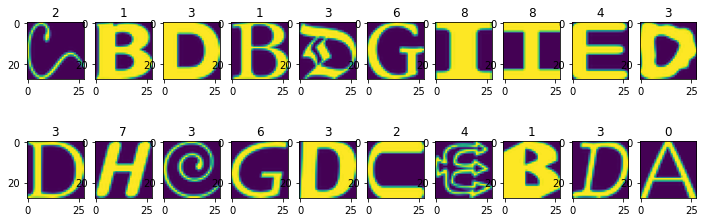

In [15]:
%matplotlib inline
plt.figure(figsize=[12, 4])
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.title(str(y_train[i]))

  0%|                                                                                                                                         | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:55<00:00,  1.80it/s]


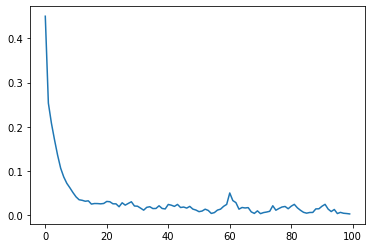

In [16]:
#< a whole lot of your code > 
from torch import nn
from torch.optim import Adam
from tqdm import trange


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.nn = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(inplace=True),
            nn.Linear(512, 10),
            nn.LogSoftmax(),
        )
        
    def forward(self, t):
        return self.nn(t)
    
    
clf = Classifier()
opt = Adam(clf.parameters())
losses = []
    
for epoch in trange(100):
    epoch_loss = []
    for ibatch in range(X_train.shape[0] // 128):
        ids = torch.randint(0, X_train.shape[0], (128,))
        X = torch.tensor(X_train[ids])
        Y = torch.tensor(y_train[ids])
        logp = clf(X)
        loss = nn.functional.nll_loss(logp, Y)
        
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        epoch_loss.append(loss.detach().numpy())
    losses.append(np.mean(epoch_loss))
    
plt.plot(losses)


In [17]:
_, ids = torch.max(clf(torch.tensor(X_test)).exp(), dim=1)
ids = ids.numpy()

accuracy = (ids == y_test).sum() / ids.shape[0]
accuracy

0.9196752830591753

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

# SPOILERS!

Recommended pipeline:

* Adapt logistic regression from previous assignment to classify one letter against others (e.g. A vs the rest)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - Softmax (exp over sum of exps) can be implemented manually or as `torch.softmax` (function)
  - Probably better to use STOCHASTIC gradient descent (minibatch) for greater speed
    - You can also try momentum/rmsprop/adawhatever
    - in which case the dataset should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (e.g. sigmoid) instead of softmax
  - You need to train both layers, not just the output layer :)
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve. 
  - In ideal case this totals to 2 `torch.matmul`'s, 1 softmax and 1 ReLU/sigmoid
  - __Make sure this neural network works better than logistic regression!__
  
* Now's the time to try improving the network. Consider layers (size, neuron count), nonlinearities, optimization methods, initialization — whatever you want, but please avoid convolutions for now.
  
* If anything seems wrong, try going through one step of training and printing everything you compute.
* If you see NaNs midway through optimization, you can estimate $\log P(y \mid x)$ as `torch.log_softmax(last_linear_layer_outputs)`.